
1. construct the graph of Y on X
2. Decide the set of lines potentially matching the data
3. conduct the test. Make the correspndednt regressions, make a decision which regression should be selected
4.From the selected model, analyse what coefficients are not 0
5. maka a conclusion, draw the data+the regression line



In [32]:
import random as rd
import pandas as pd
import matplotlib.pyplot as plt
rd.seed(123)
Y=[]
X=[]
for i in range(0,300):
    X.append(rd.uniform(-3, 3))
    Y.append(X[i]**4-X[i]**3-5*X[i]**2+X[i]+5+rd.normalvariate(0,5))
  
    


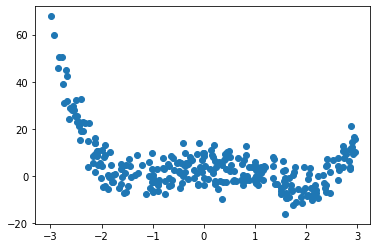

In [33]:
OriginalData=pd.DataFrame({"Y":Y, "X":X})
plt.scatter(OriginalData.X,OriginalData.Y)
plt.show()

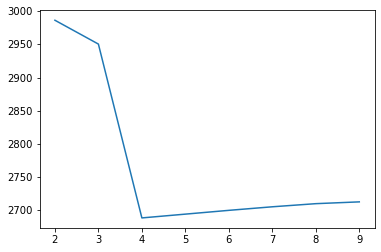

In [34]:
import numpy as np
from scipy import stats
#make a starting point, iterate the process for automatic generation of M1,2,3,4... dataframe
BIC=[]
BIC_X=[]

Ydf=OriginalData[OriginalData.columns[0]]
y=Ydf.values
Xdf=pd.DataFrame({"C":np.ones(len(OriginalData.X)), "X":OriginalData.X})
for i in range(2,10):
    xp=[]
    for j in range(0, len(Xdf.X)):
        xp.append(Xdf.X[j]**i)
    ColumnName='X'+str(i)
    Xdf[ColumnName]=xp    
    #on each step conduct calculation of BIC value
    x=Xdf.values
    B=np.matmul(np.matmul(np.linalg.inv(np.matmul(x.transpose(),x)),x.transpose()),y) #coefficients
    e=np.subtract(np.matmul(x,B),y)
    SSE=np.matmul(e.transpose(),e) # Sum of squared errors for BIC
    BIC.append(len(y)*np.log(SSE)+i*np.log(len(y)))
    BIC_X.append(i)

#check BIC plot
plt.plot(BIC_X,BIC)
plt.show()

check the graph, find the minimal value
<br>it is the 4th item, correspondent to the 4th power of equation. Limit the dataframe

In [35]:
Xdf=Xdf[Xdf.columns[:5]]

calculate for regression and all the rest parameeters  for the selected model

In [36]:
x=Xdf.values

B=np.matmul(np.matmul(np.linalg.inv(np.matmul(x.transpose(),x)),x.transpose()),y)

e=np.subtract(np.matmul(x,B),y)
MSE=np.matmul(e.transpose(),e)/(len(e)-len(Xdf.columns))
s=np.sqrt(MSE)
var_b=MSE*(np.linalg.inv(np.matmul(x.transpose(),x)).diagonal())
sd_b = np.sqrt(var_b)
ts_b=B/sd_b
p_values =np.round([2*(1-stats.t.cdf(np.abs(i),(len(y)-len(Xdf.columns)))) for i in ts_b],3) 

# check if there are any p_values higher that wanted threshold 
print(p_values)

[0. 0. 0. 0. 0.]


In [37]:
SSE=np.matmul(e.transpose(),e)
SST=np.sum((y-np.mean(y))**2)

Rsq=1-SSE/SST

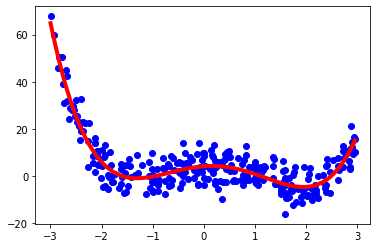

In [38]:
#Sorting dataframe to make a connected curve
temp=pd.DataFrame(Xdf.X.values,columns=['Value'])
temp['Target']=np.matmul(x,B)
#Sort the dataframe
temp=temp.sort_values(by=['Value'])
#plot the regression line
plt.scatter(Xdf.X.values,y,color='b')
plt.plot(temp['Value'],temp['Target'],c='r',linewidth=4)

Calculating confidence interval

In [39]:
var_b


array([0.26229142, 0.18118232, 0.13950908, 0.00578444, 0.00235967])

ci=B-1.968*np.sqrt(np.matmul(var_b,np.linalg.inv(np.matmul(x.transpose(),x))))

In [41]:
lower_ci=B-1.968*np.sqrt(var_b)
upper_ci=B+1.968*np.sqrt(var_b)
print(upper_ci)
print(lower_ci)

[ 5.04242024  2.42161052 -4.13822696 -0.90817973  1.09666436]
[ 3.02662169  0.74623181 -5.60835893 -1.20753411  0.90546755]


ValueError: x and y must have same first dimension, but have shapes (300,) and (5,)

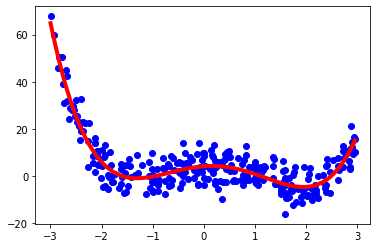

In [44]:

plt.plot(temp['Value'],lower_ci,c='y',linewidth=4) 

plt.plot(temp['Value'],upper_ci,c='y',linewidth=4) 

In [43]:
temp['Value']

114   -2.997910
289   -2.937063
197   -2.845507
33    -2.830452
159   -2.771965
         ...   
82     2.902025
96     2.906671
297    2.941924
134    2.947964
18     2.950759
Name: Value, Length: 300, dtype: float64